# Basic imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Loading datasets

In [2]:
cns_df=pd.read_csv("cns_molecules.csv", sep="\t")
non_cns_df=pd.read_csv("non_cns_molecules.csv", sep="\t")

In [3]:
cns_df_length=len(cns_df)
non_cns_df_length=len(non_cns_df)

print("cns rows: {}".format(cns_df_length))
print("non cns rows: {}".format(non_cns_df_length))

cns rows: 316
non cns rows: 624


# New column for both datasets (1= true, 0=false)

In [4]:
new_cns_column=[1 for i in range(cns_df_length)]
new_non_cns_columns=[0 for i in range(non_cns_df_length)]

In [5]:
cns_df["is_cns_molecule"]=new_cns_column
non_cns_df["is_cns_molecule"]=new_non_cns_columns

### Merged dataset

In [6]:
mixed_df=cns_df
mixed_df=mixed_df.append(non_cns_df)

### Shuffle dataset

The idiomatic way to do this with Pandas is to use the .sample method of your dataframe to sample all rows without replacement:

df.sample(frac=1)
The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return all rows (in random order).

Note: If you wish to shuffle your dataframe in-place and reset the index, you could do e.g.

df = df.sample(frac=1).reset_index(drop=True)
Here, specifying drop=True prevents .reset_index from creating a column containing the old index entries.

In [7]:
mixed_df=mixed_df.sample(frac=1,random_state=0).reset_index(drop=True)

In [8]:
mixed_df.to_csv("molecules_v1.csv",sep="\t",index = False, header=True); mixed_df

,m_name,n_atoms_without_Hydrogen,n_atoms_with_Hydrogen,m_weight,m_avg_weigth,m_weigth_without_Hydrogen,n_radical_electrons,n_valence_electrons,n_aliphatic_carbocycles,n_aliphatic_heterocycles,...,n_Hydrogen_acceptors,n_Hydrogen_donnors,n_briged_head_atoms,n_atoms_stereo_centers,n_atoms_unspecified_stereo_centers,n_spiro_atoms,m_logp,m_mr,fraction_CSP3,is_cns_molecule
0,BUMETANIDE,25,45,364.109293,344.263,364.423,0,134,0,0,...,5,3,0,0,0,0,3.0365,94.6882,0.235294,0
1,BACLOFEN,14,26,213.055656,201.568,213.664,0,76,0,0,...,2,2,0,1,1,0,1.8570,55.5002,0.300000,1
2,METYRAPONE,17,31,226.110613,212.167,226.279,0,86,0,0,...,3,0,0,0,0,0,2.6371,65.8305,0.214286,0
3,METHYLPHENOBARBITAL,18,32,246.100442,232.154,246.266,0,94,0,1,...,3,1,0,1,1,0,1.0426,64.7197,0.307692,1
4,DULOXETINE,21,40,297.118735,278.271,297.423,0,108,0,0,...,3,1,0,1,1,0,4.6309,90.1797,0.222222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,SAPROPTERIN,17,32,241.117489,226.131,241.251,0,94,0,1,...,7,6,0,3,3,0,-1.7002,62.8581,0.555556,0
936,PHENELZINE,10,22,136.100048,124.102,136.198,0,54,0,0,...,2,2,0,0,0,0,0.6924,42.3361,0.250000,1
937,ISOPROTERENOL_HYDROCHLORIDE,15,32,211.120843,194.125,211.261,0,84,0,0,...,4,4,0,1,1,0,1.1292,57.8701,0.454545,0
938,FLOCTAFENINE,29,46,406.114042,389.224,406.360,0,152,0,0,...,6,3,0,1,1,0,3.5072,99.8448,0.200000,0


# Masks

In [9]:
mask_cns_molecules=mixed_df["is_cns_molecule"]==1
mask_non_cns_molecules=mixed_df["is_cns_molecule"]==0

In [10]:
is_cns_molecule=mixed_df[mask_cns_molecules]
is_not_cns_molecule=mixed_df[mask_non_cns_molecules]

In [11]:
columns=mixed_df.columns.values; columns

array(['m_name', 'n_atoms_without_Hydrogen', 'n_atoms_with_Hydrogen',
       'm_weight', 'm_avg_weigth', 'm_weigth_without_Hydrogen',
       'n_radical_electrons', 'n_valence_electrons',
       'n_aliphatic_carbocycles', 'n_aliphatic_heterocycles',
       'n_aliphatic_rings', 'n_amide_bonds', 'n_aromatic_carbocycles',
       'n_aromatic_heterocycles', 'n_aromatic_rings',
       'n_saturated_carbocycles', 'n_saturated_heterocycles',
       'n_saturated_rings', 'n_HBA', 'n_HBD', 'n_hetero_atoms',
       'n_hetero_cycles', 'n_rings', 'n_strict_rotable_bonds',
       'n_non_strict_rotable_bonds', 'n_primary_carbon_atoms', 'n_HOH',
       'n_O', 'n_Hydrogen_acceptors', 'n_Hydrogen_donnors',
       'n_briged_head_atoms', 'n_atoms_stereo_centers',
       'n_atoms_unspecified_stereo_centers', 'n_spiro_atoms', 'm_logp',
       'm_mr', 'fraction_CSP3', 'is_cns_molecule'], dtype=object)

# Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [13]:
mixed_df=mixed_df.set_index(["m_name"])

In [14]:
clf = LinearSVC(random_state=0, tol=1e-5, dual=False)

In [15]:
y=mixed_df["is_cns_molecule"]
x=mixed_df.drop(["is_cns_molecule"],axis=1)

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [17]:
clf.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [18]:
predicted=clf.predict(x_test)

In [19]:
matrix=confusion_matrix(y_test,predicted)
matrix_labels=[["True positive","False positive"],
                         ["False negative","True negative"]]

In [20]:
for i in range(2):
    for j in range(2):
        print("{} {}".format(matrix_labels[i][j],matrix[i][j]))

True positive 104
False positive 9
False negative 29
True negative 46


In [21]:
print("f1 score: {}%".format(f1_score(y_test,predicted)*100)) 
print("accuracy score: {}%".format(accuracy_score(y_test,predicted)*100))

f1 score: 70.76923076923075%
accuracy score: 79.7872340425532%


# Feature selection functions

#### Default parameters 
selection_type=mutual_info_regression, selected_k=len(x.columns)/2, columns_length=len(x.columns), data=x, historical_class=y

In [22]:
from sklearn.feature_selection import *

def selector_scores(selection_type=mutual_info_regression,selected_k=len(x.columns)/2,columns_length=len(x.columns),
                    data=x,historical_class=y):
    
    def get_scores(selector,columns_length):      
        scores = selector.scores_
        plt.figure(figsize=(12,8),dpi=80)
        plt.plot(scores)
        plt.xticks(np.arange(columns_length),[x for x in range(columns_length)]);
        
        return scores
    
    selector = SelectKBest(selection_type, k=selected_k)
    selector.fit(data,historical_class)
    scores=get_scores(selector,columns_length)
    
    return scores

In [23]:
from itertools import chain 

def get_fixed_list(lst: list):   
    def remove_duplicates(lst_1d: list):
        unique_lst = []
        for data in lst_1d:
            if data not in unique_lst:
                unique_lst.append(data)
        return unique_lst  
    
    lst_1d=list(chain.from_iterable(lst))
    return remove_duplicates(lst_1d)

In [24]:
def get_weigth_zero_features(data,scores):
    weight_zero_features=[]
    for label,i in zip(data.columns,scores):
        if i==0: weight_zero_features.append(label)
            
    return weight_zero_features

In [25]:
def get_weigths_n_iteration(x,y,n):        
    lst=[]
    for i in range(n):
        scores=selector_scores(data=x,historical_class=y)
        weight_zero_features=get_weigth_zero_features(x,scores)
        lst.append(weight_zero_features)
        
    return get_fixed_list(lst)

# Weight grahps

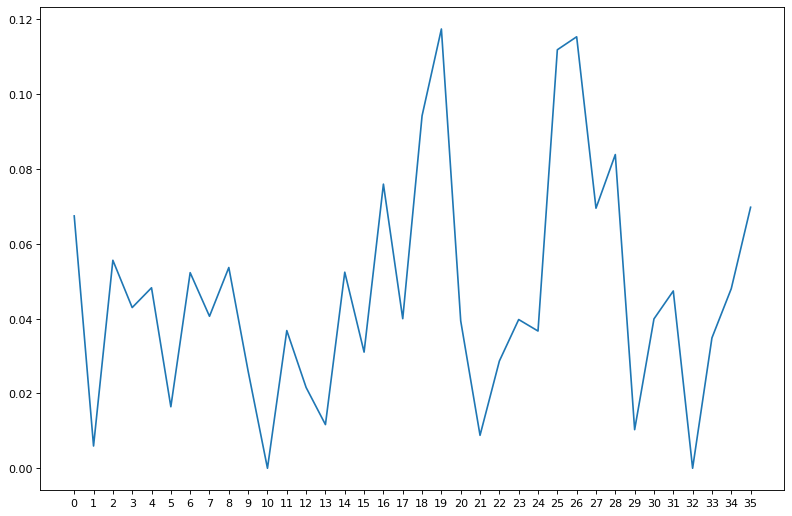

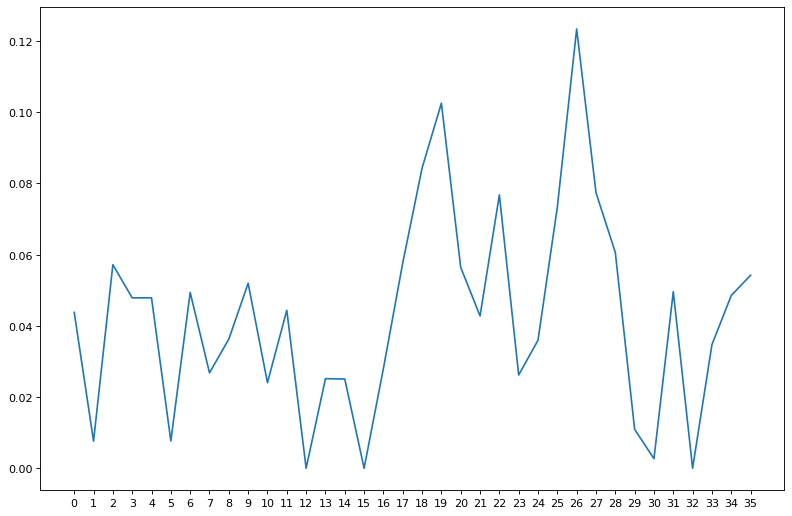

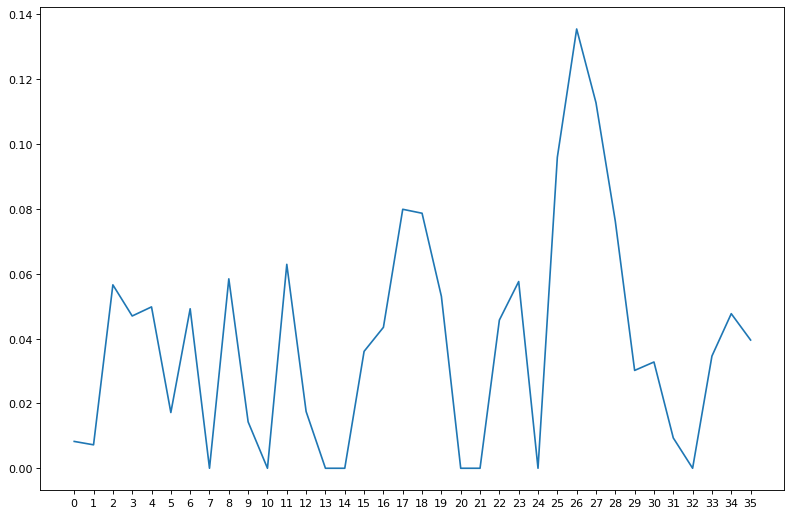

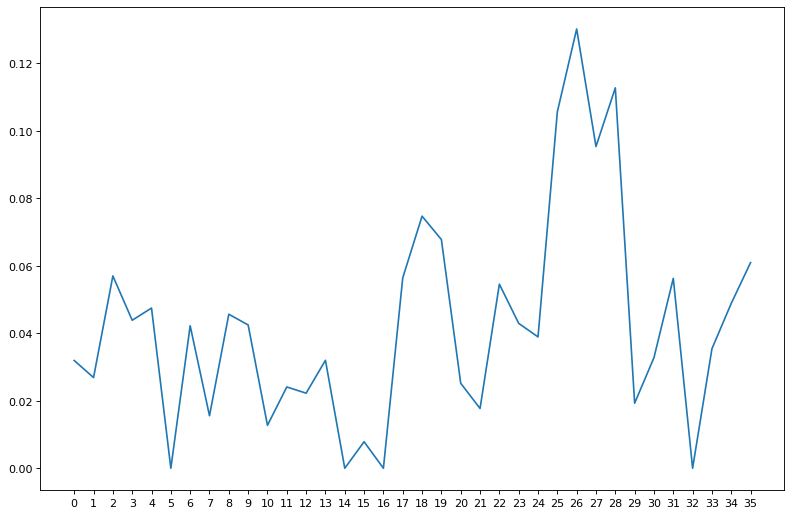

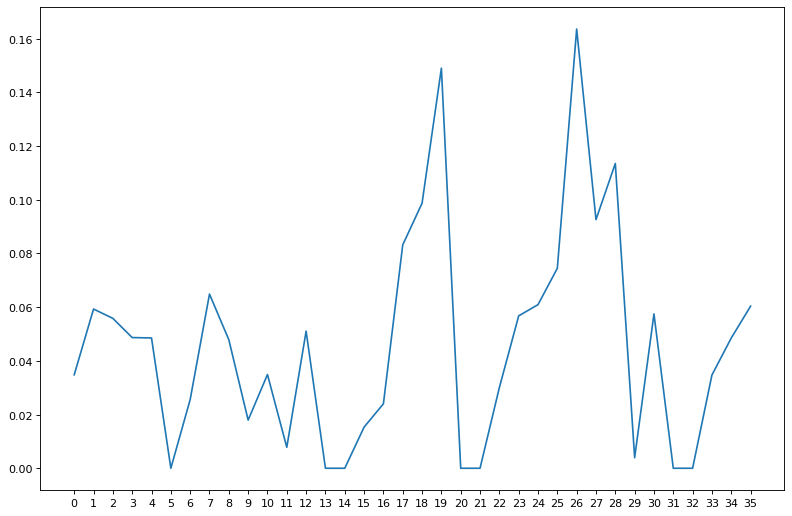

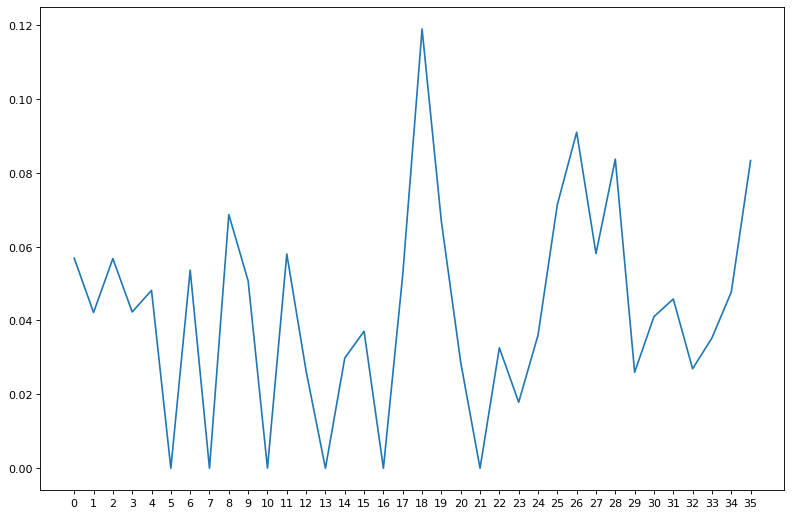

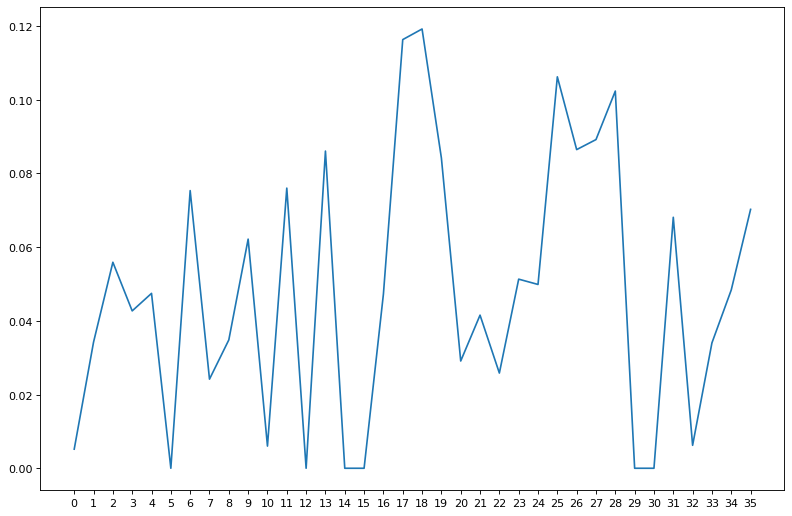

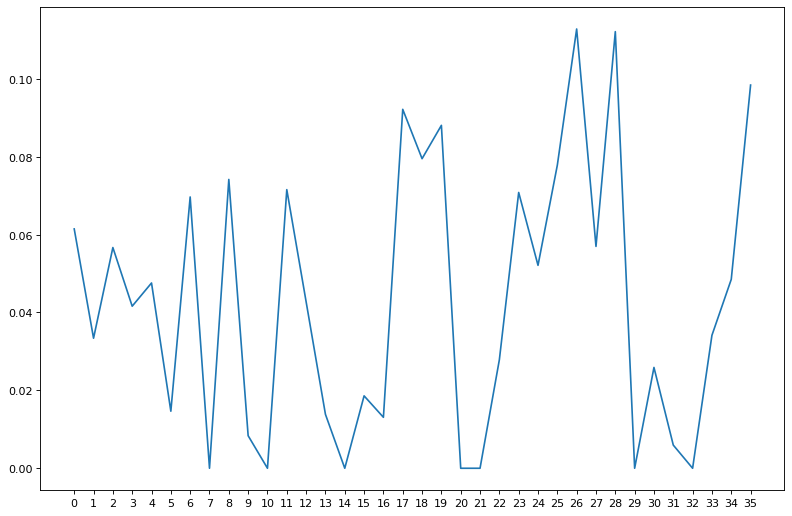

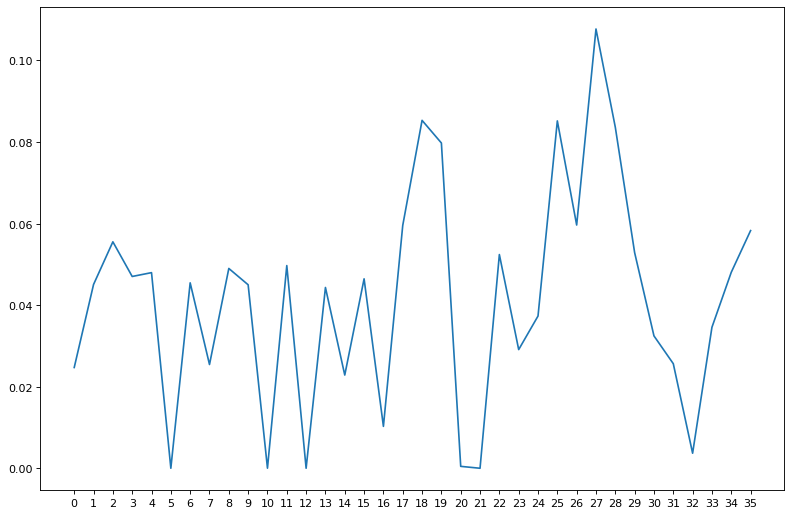

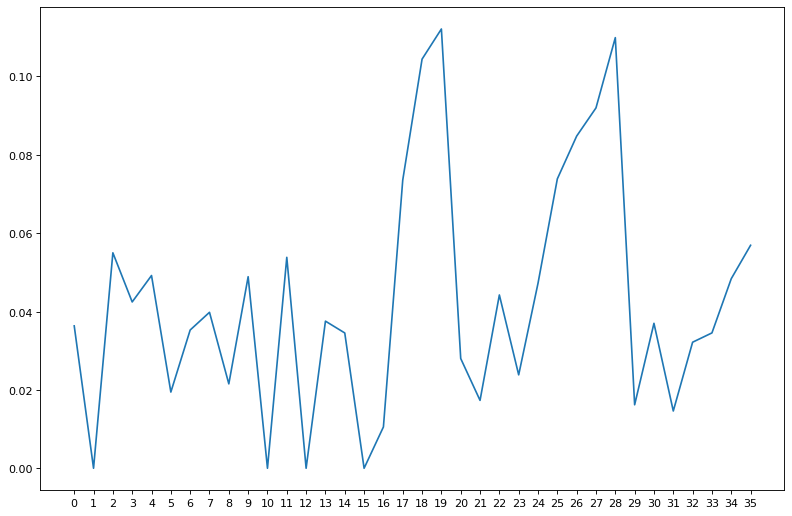

In [26]:
weight_zero_features=get_weigths_n_iteration(x,y,n=10)

# Getting rid of weigth 0 features

In [27]:
weight_zero_features

['n_amide_bonds',
 'n_spiro_atoms',
 'n_aromatic_heterocycles',
 'n_saturated_heterocycles',
 'n_aliphatic_carbocycles',
 'n_aromatic_rings',
 'n_saturated_carbocycles',
 'n_hetero_cycles',
 'n_rings',
 'n_primary_carbon_atoms',
 'n_radical_electrons',
 'n_saturated_rings',
 'n_atoms_unspecified_stereo_centers',
 'n_briged_head_atoms',
 'n_atoms_stereo_centers',
 'n_atoms_with_Hydrogen']

In [28]:
mixed_df=mixed_df.drop(weight_zero_features,axis=1); mixed_df.shape

(940, 21)

# New csv

In [29]:
mixed_df.to_csv("molecules_v2.csv",sep="\t",index = False, header=True)